In [24]:
# Crie um modelo determinístico para algum sistema de seu interesse. 
# Defina claramente o problema que o sistema representa e o que se deseja medir com uma simulação. 
# Faça um estudo sobre as condições de entrada e saída do modelo e execute algumas simulações do sistema. 
# Apresente os resultados da simulação de duas formas diferentes.

In [25]:
# Modelo SIR - Modelo compartimental em epidemiologia
# Esse modelo simplifica a modelagem matemática de doenças infecciosas. 
# A população é atribuída a compartimentos com rótulos 
# rótulos: S, I ou R, (Susceptível, Infeccioso ou Recuperado). 
# As pessoas podem progredir entre os compartimentos. 
# A ordem das etiquetas geralmente mostra os padrões de fluxo entre os compartimentos 
# exemplo: SEIS significa suscetível, exposto, infeccioso e, em seguida, suscetível novamente.

In [26]:
from scipy.integrate import ode, solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
N = 15000 # população total
I0, R0, M0 = 1, 0, 0 # número inicial de indivíduos infectados (I0), recuperados (R0) e mortos (M0).
S0 = N - I0 - R0 - M0 # suscetíveis (S0) à infeção.

# taxa de infecção (beta), taxa de recuperação (gamma), e taxa de mortalidade (alpha) em 1/dias.
beta, gama, alpha = 0.0001, 1/10, 0.03 

eventos = range(0, 61) # dias de monitoramento
pontos = [0, 1001] # intervalo de integração

In [28]:
def deriv(t, y, N, beta, gama, alpha):
    S, I, R, M = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gama * I - alpha * I
    dRdt = gama * I
    dMdt = alpha * I
    return dSdt, dIdt, dRdt, dMdt

In [29]:
y0 = S0, I0, R0, M0

In [30]:
# integração das equações do modelo SIR
sol = solve_ivp(deriv, pontos, y0, args=(N, beta, gama, alpha), t_eval=eventos, method='RK23')

In [31]:
out = pd.DataFrame({"t":sol["t"],"Suscetíveis":sol["y"][0],"Infectados":sol["y"][1],"Recuperados":sol["y"][2], "Mortos":sol["y"][0]})

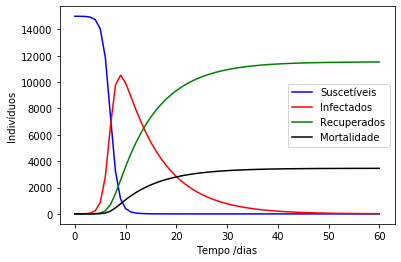

In [32]:
graf = plt.figure(facecolor='w')
plt.xlabel('Tempo /dias')
plt.ylabel('Indivíduos')
plt.plot(sol.t, sol.y[0], 'b', label='Suscetíveis')
plt.plot(sol.t, sol.y[1], 'r', label='Infectados')
plt.plot(sol.t, sol.y[2], 'g', label='Recuperados')
plt.plot(sol.t, sol.y[3], 'k', label='Mortalidade')
plt.legend()
plt.show()

In [33]:
def sir(tempo, inicio, parametros):
    beta, gama = parametros
    S,I,R = inicio
    
    dS = -beta*S*I
    dI = beta*S*I-gama*I
    dR = gama*I
    return [dS,dI,dR]

In [34]:
parametros = [0.1,0.05] # taxas beta e gama
inicio = [0.99,0.01,0]
tempo = np.linspace(0,200,2001)

In [35]:
sol = solve_ivp(fun=lambda t, y: sir(t, y, parametros), t_span=[min(tempo),max(tempo)], y0=inicio, t_eval=tempo)

In [36]:
out = pd.DataFrame({"t":sol["t"],"S":sol["y"][0],"I":sol["y"][1],"R":sol["y"][2]})

In [37]:
plt.style.use("ggplot")

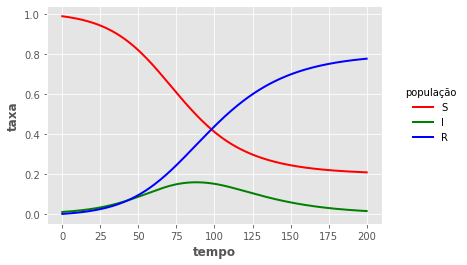

In [39]:
sline = plt.plot("t","S","",data=out,color="red",linewidth=2)
iline = plt.plot("t","I","",data=out,color="green",linewidth=2)
rline = plt.plot("t","R","",data=out,color="blue",linewidth=2)
plt.xlabel("tempo",fontweight="bold")
plt.ylabel("taxa",fontweight="bold")
legend = plt.legend(title="população",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)